In [ ]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 616 kB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 29.9 MB/s 
     |████████████████████████████████| 3.4 MB 35.1 MB/s 
     |████████████████████████████████| 1.1 MB 36.4 MB/s 
     |████████████████████████████████| 1.1 MB 34.6 MB/s 
     |████████████████████████████████| 87 kB 6.2 MB/s 
     |████████████████████████████████| 120 kB 44.6 MB/s 
     |████████████████████████████████| 840 kB 45.4 MB/s 
     |████████████████████████████████| 237 kB 48.7 MB/s 
     |████████████████████████████████| 77 kB 6.0 MB/s 
     |████████████████████████████████| 6.4 MB 27.3 MB/s 
     |████████████████████████████████| 596 kB 47.4 MB/s 
     |████████████████████████████████| 25.3 MB 1.9 MB/s 
     |████████████████████████████████| 47.8 MB 49 kB/s 
     |████████████████████████████████| 99 kB 8.5 MB/s 
     |████████████████████████████████| 352 kB 43.7 MB/s 
     |████████████████████████████████| 93 kB 1.3 MB/s 
     |██████████████████

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets download -d gpiosenka/100-bird-species
!kaggle datasets download -d vvvalter/chess-pieces
#!unzip 100-bird-species.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 99% 1.03G/1.05G [00:05<00:00, 105MB/s] 
100% 1.05G/1.05G [00:05<00:00, 193MB/s]


In [ ]:
import zipfile
#with zipfile.ZipFile('100-bird-species.zip', 'r') as zip_ref:
with zipfile.ZipFile('chess-pieces.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

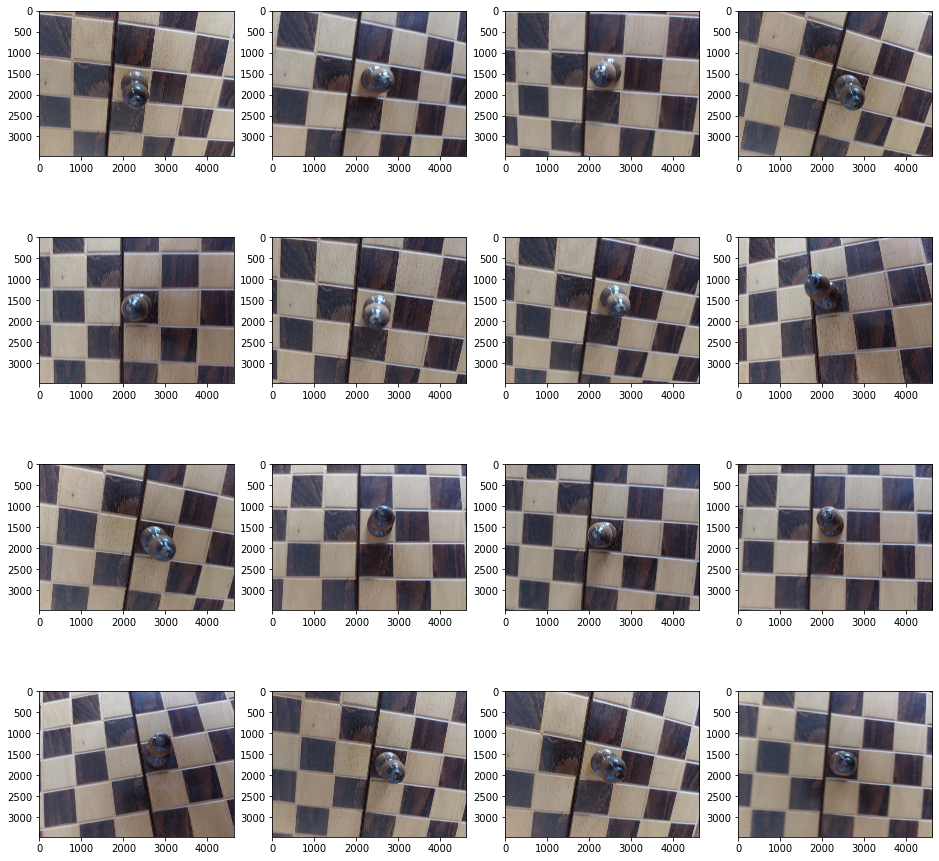

In [ ]:
nrows = 4
ncols = 4
#imagenames = os.listdir(os.path.join("train", "ABBOTTS BABBLER"))
imagenames = os.listdir(os.path.join("chess-pieces", "black bishop"))

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

#next_images = [os.path.join(os.path.join("train", "ABBOTTS BABBLER"), fname) for fname in imagenames[:int(ncols*nrows)]]
next_images = [os.path.join(os.path.join("chess-pieces", "black bishop"), fname) for fname in imagenames[:int(ncols*nrows)]]

for i, img_path in enumerate(next_images):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [ ]:
#data = DataLoader.from_folder('train')
data = DataLoader.from_folder('chess-pieces')
train_data, test_data = data.split(0.9)

#train_data, rest_data = data.split(0.8)
#validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 246, num_label: 12, labels: black bishop, black king, black knight, black pawn, black queen, black rook, white bishop, white king, white knight, white pawn, white queen, white rook.


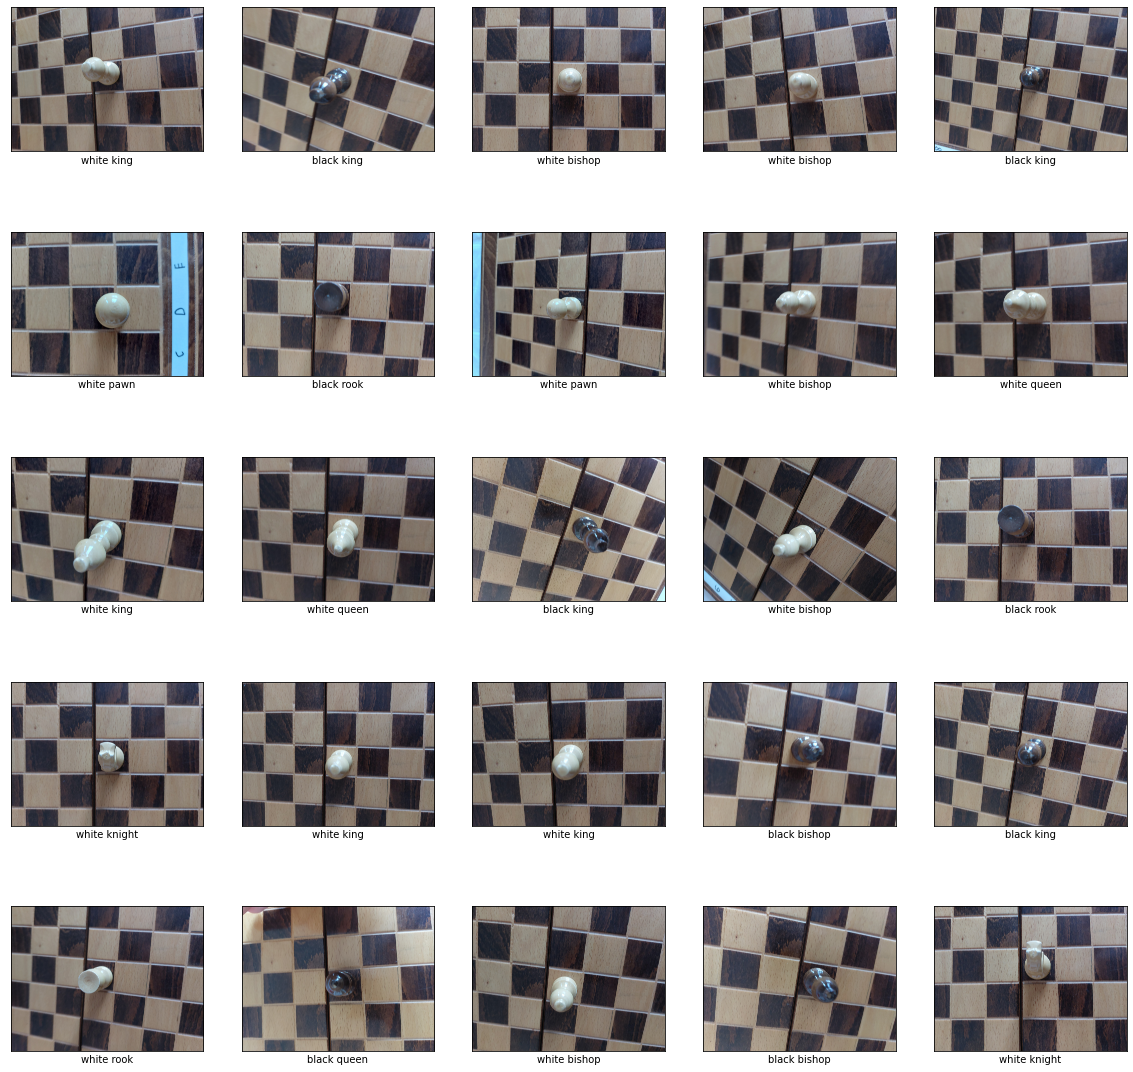

In [ ]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
model = image_classifier.create(train_data, epochs=10)
#model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 12)                15372     
                                                                 
Total params: 3,428,396
Trainable params: 15,372
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


6/6 [==============================] - 101s 16s/step - loss: 2.7519 - accuracy: 0.0781
Epoch 2/10
6/6 [==============================] - 97s 16s/step - loss: 2.4163 - accuracy: 0.1719
Epoch 3/10
6/6 [==============================] - 97s 16s/step - loss: 2.0599 - accuracy: 0.3542
Epoch 4/10
6/6 [==============================] - 97s 16s/step - loss: 1.7950 - accuracy: 0.5000
Epoch 5/10
6/6 [==============================] - 98s 16s/step - loss: 1.6231 - accuracy: 0.5833
Epoch 6/10
6/6 [==============================] - 99s 16s/step - loss: 1.5369 - accuracy: 0.6406
Epoch 7/10
6/6 [==============================] - 98s 16s/step - loss: 1.3897 - accuracy: 0.7083
Epoch 8/10
6/6 [==============================] - 98s 16s/step - loss: 1.2971 - accuracy: 0.7396
Epoch 9/10
6/6 [==============================] - 98s 16s/step - loss: 1.2223 - accuracy: 0.7656
Epoch 10/10
6/6 [==============================] - 99s 16s/step - loss: 1.2184 - accuracy: 0.7760


In [ ]:
loss, accuracy = model.evaluate(test_data)

1/1 [==============================] - 31s 31s/step - loss: 1.5635 - accuracy: 0.5200


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 12)                15372     
                                                                 
Total params: 3,428,396
Trainable params: 15,372
Non-trainable params: 3,413,024
_________________________________________________________________


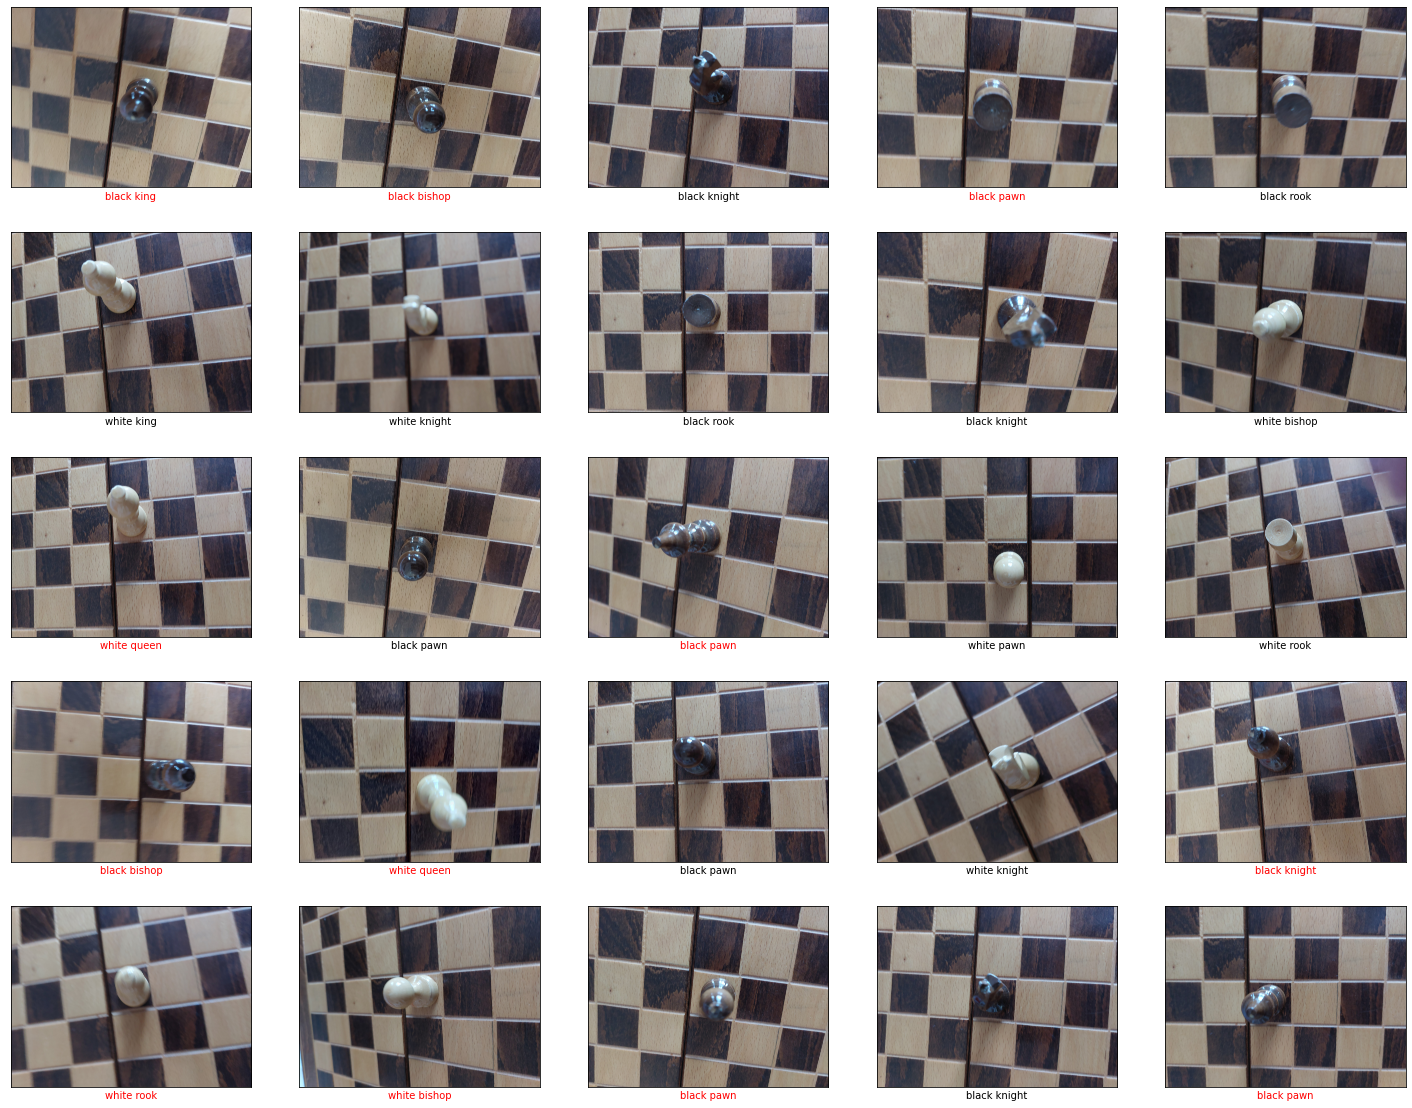

In [ ]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

plt.figure(figsize=(25, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(25)):
  ax = plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel(predict_label)
plt.show()

In [ ]:
model.export(export_dir='.', tflite_filename='chess-pieces.tflite')

INFO:tensorflow:Assets written to: /tmp/tmpg5ei1kpa/assets


INFO:tensorflow:Assets written to: /tmp/tmpg5ei1kpa/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpizhky8fh/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpizhky8fh/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./chess-pieces.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./chess-pieces.tflite
